In [ ]:
import torch

In [ ]:
torch.version.cuda

'11.8'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
device = torch.device('cuda')

In [ ]:
import torch
import tqdm as notebook_tqdm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.linalg import eig

In [ ]:
data = pd.read_csv('banknotes.csv')

FileNotFoundError: ignored

In [ ]:
data.head()

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data.info()

In [ ]:
y = data['conterfeit']
y.head()

In [ ]:
X = data.drop('conterfeit',axis=1)
sc = StandardScaler()
x = sc.fit_transform(X)

In [ ]:
X.head()

In [ ]:
x

In [ ]:
PyData = torch.tensor(x,dtype = torch.float32)
PyY = torch.tensor(y)

In [ ]:
PyData.device, PyY.device

In [ ]:
PyData = PyData.to(device)
PyY = PyY.to(device)

In [ ]:
PyData.device, PyY.device

In [ ]:
# PyData_mean = torch.mean(PyData, dim=0)
# PyData_centered = PyData - PyData_mean

In [ ]:
pca = torch.pca_lowrank(PyData)

In [ ]:
pca

In [ ]:
pca_x = pca[0][:,:5]

# Neural Network MODEL

In [ ]:
X_train = pca_x[:160]
X_test = pca_x[-40:]

In [ ]:
X_test.shape

torch.Size([40, 5])

In [ ]:
y_train = PyY[:160]
y_test = PyY[-40:]

In [ ]:
y_test

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
from collections import OrderedDict
import torch.nn as nn

This is a function that defines a neural network model using the PyTorch library in Python. The model has an input layer with infet input features, a hidden layer with hiddDim neurons, and an output layer with nbClass output classes.

The nn.Sequential container is used to sequentially stack the layers of the neural network. In this case, the neural network has two layers - a fully connected linear layer (nn.Linear) and a ReLU activation layer (nn.ReLU). The first layer takes the input and applies a linear transformation to it, producing hiddDim output values. The output of the first layer is then passed through the ReLU activation function, which applies a non-linear transformation to it. The output of the activation function is then passed through another linear layer (nn.Linear) to produce the final output of the model.

The function returns the constructed model.

In [ ]:
def model(infet=5,hiddDim=8,nbClass=2):
  model = nn.Sequential(
      OrderedDict([
          ('hiddenLayer1', nn.Linear(infet,hiddDim)),
          ('activation1',nn.ReLU()),
          ("output_layer", nn.Linear(hiddDim, nbClass))
      ])
  )

  return model

In [ ]:
model1 = model()
mlp = model1.to(device)
mlp

Sequential(
  (hiddenLayer1): Linear(in_features=5, out_features=8, bias=True)
  (activation1): ReLU()
  (output_layer): Linear(in_features=8, out_features=2, bias=True)
)

Input (5 features) -> Hidden Layer (8 neurons) -> ReLU Activation -> Output Layer (2 neurons)

In [ ]:
# from pyimagesearch import mlp
from torch.optim import SGD
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_blobs

In [ ]:
opt = SGD(mlp.parameters(),lr=1e-2)
lossFunc = nn.CrossEntropyLoss()

opt = SGD(mlp.parameters(), lr=1e-2) creates an instance of the stochastic gradient descent (SGD) optimizer to update the parameters of the mlp model during training. The lr parameter sets the learning rate for the optimizer.
lossFunc = nn.CrossEntropyLoss() creates an instance of the cross-entropy loss function, which is commonly used for multi-class classification problems. This loss function computes the negative log-likelihood of the predicted class probabilities for each sample in the batch, given the true class labels. The loss is then used to compute gradients for backpropagation and update the model parameters during training.

In [ ]:
EPOCHS = 300
BATCH_SIZE = 10

In [ ]:
def next_batch(inputs, targets, batchSize):
	# loop over the dataset
	for i in range(0, inputs.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [ ]:
for epoch in range(0, EPOCHS):
	# initialize tracker variables and set our model to trainable
	print("[INFO] epoch: {}...".format(epoch + 1))
	trainLoss = 0
	trainAcc = 0
	samples = 0
	mlp.train()
	# loop over the current batch of data
	for (batchX, batchY) in next_batch(X_train, y_train, BATCH_SIZE):
		# flash data to the current device, run it through our
		# model, and calculate loss
		(batchX, batchY) = (batchX.to(device), batchY.to(device))
		predictions = mlp(batchX)
		loss = lossFunc(predictions, batchY.long())
		# zero the gradients accumulated from the previous steps,
		# perform backpropagation, and update model parameters
		opt.zero_grad()
		loss.backward()
		opt.step()
		# update training loss, accuracy, and the number of samples
		# visited
		trainLoss += loss.item() * batchY.size(0)
		trainAcc += (predictions.max(1)[1] == batchY).sum().item()
		samples += batchY.size(0)
	# display model progress on the current training batch
	trainTemplate = "epoch: {} train loss: {:.3f} train accuracy: {:.3f}"
	print(trainTemplate.format(epoch + 1, (trainLoss / samples),
		(trainAcc / samples)))

[INFO] epoch: 1...
epoch: 1 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 2...
epoch: 2 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 3...
epoch: 3 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 4...
epoch: 4 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 5...
epoch: 5 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 6...
epoch: 6 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 7...
epoch: 7 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 8...
epoch: 8 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 9...
epoch: 9 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 10...
epoch: 10 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 11...
epoch: 11 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 12...
epoch: 12 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 13...
epoch: 13 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 14...
epoch: 14 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 15...
epoch: 15 train lo

This code block represents the training loop for a PyTorch MLP (Multi-Layer Perceptron) model. Here's a breakdown of what's happening:

- The loop iterates over a set number of epochs.
- At the start of each epoch, training loss, accuracy, and the number of samples are initialized to zero.
- The model is set to "trainable" mode using `mlp.train()`.
- The data is processed in batches using `next_batch()` function which returns a generator that yields `BATCH_SIZE` samples of input data and their corresponding labels.
- Each batch of data is loaded to the GPU (if available) and passed through the model to make predictions using `mlp(batchX)`.
- The predictions are compared against the actual labels using the `nn.CrossEntropyLoss()` function which calculates the loss.
- The gradients are zeroed out using `opt.zero_grad()` to prevent the gradients from the previous batch from accumulating.
- The gradients are backpropagated using `loss.backward()` to compute the gradients of the loss with respect to the model parameters.
- The optimizer is used to update the model parameters using `opt.step()`.
- Training loss, accuracy, and number of samples are updated.
- The training progress is printed at the end of each epoch.

The purpose of this code block is to update the MLP model's weights in such a way that the loss is minimized over the training set.

In [ ]:
pred = mlp(X_test)

In [ ]:
pred = pred.max(1)[1]
pred

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
y_test

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_true = y_test.to('cpu')
y_pred = pred.to('cpu')
y_true

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
y_true = y_true.numpy()
y_pred = y_pred.numpy()

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[21,  1],
       [ 0, 18]])

In [ ]:
classes = ['Not Counterfiet','Counterfiet']

<Axes: >

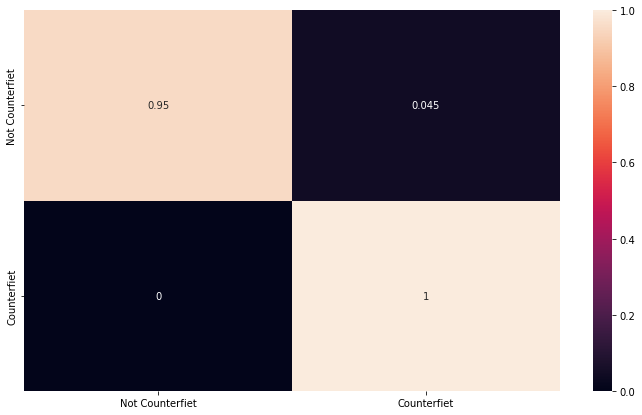

In [ ]:
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)